In [16]:
!pip install mediapipe

In [17]:
my_video_poses = []

In [18]:
import cv2
import mediapipe as mp
import time
import matplotlib.pyplot as plt
mpPose = mp.solutions.pose
pose = mpPose.Pose()
mpDraw = mp.solutions.drawing_utils

#cap = cv2.VideoCapture(0)
cap = cv2.VideoCapture('a.mp4')
pTime = 0
fps=0;
init_time = time.time()

while True:
    success, img = cap.read()
    imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    results = pose.process(imgRGB)
    if results.pose_landmarks:
        mpDraw.draw_landmarks(img, results.pose_landmarks, mpPose.POSE_CONNECTIONS)
        for id, lm in enumerate(results.pose_landmarks.landmark):
            h, w,c = img.shape
            cx, cy = int(lm.x*w), int(lm.y*h)
            cv2.circle(img, (cx, cy), 5, (255,0,0), cv2.FILLED)
        my_video_poses.append(results)
        #my_video_poses.append(results.pose_landmarks)
    cTime = time.time()
    fps = 1/(cTime-pTime)
    pTime = cTime
    cv2.putText(img, str(int(fps)), (50,50), cv2.FONT_HERSHEY_SIMPLEX,1,(255,0,0), 3)
    cv2.imshow("Image", img)
    cv2.waitKey(1)
    if pTime-init_time > 30:
        print(pTime-init_time)
        break

30.01224684715271


In [21]:
print(len(my_video_poses))

365


AttributeError: type object 'SolutionOutputs' has no attribute 'landmark'

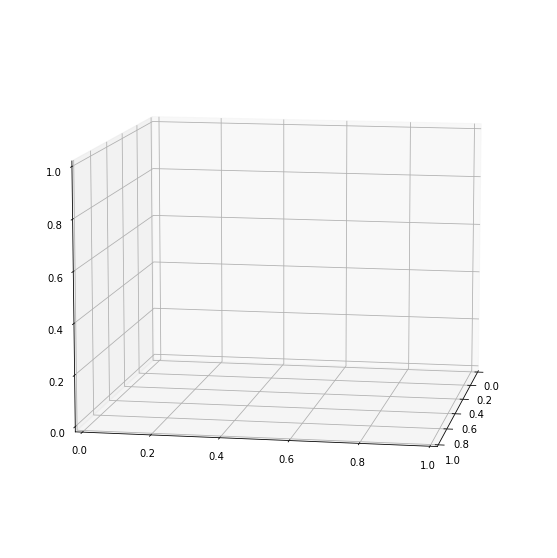

In [20]:
i=0;
zeros=0
if len(my_video_poses)>99:
    zeros = 1
if len(my_video_poses)>999:
    zeros = 2
    
for val in range(len(my_video_poses)):
    if val==100:
        zeros=zeros-1
    if val==1000:
        zeros=zeros=zeros-1
    mpDraw.plot_landmarks(my_video_poses[val], mpPose.POSE_CONNECTIONS,save='img/annotated_image_' +"0"*zeros+ str(i) + '.png',flag=False,index=i)
    #print('img/annotated_image_' + str(i) + '.png')
    i=i+1
    if val==len(my_video_poses):
        break;

In [22]:
import torch
f = open("poses_res.txt", "a")
for i in my_video_poses:
    f.write(str(i))
    f.write("\n_____\n")
f.close()

In [10]:
my_video_poses=torch.load("poses.txt")

In [27]:
my_video_poses[0]

mediapipe.python.solution_base.SolutionOutputs

In [6]:
import glob
import cv2
img_array = []
list_file = []
for filename in glob.glob('img/*.png'):
    list_file.append(filename)
    print(filename)

for fn in sorted(list_file):
    img = cv2.imread(fn)
    height, width, layers = img.shape
    size = (width,height)
    img_array.append(img)

    
out = cv2.VideoWriter('project.mp4',cv2.VideoWriter_fourcc(*'DIVX'), 15, size)
#out = cv2.VideoWriter('project.avi',cv2.VideoWriter_fourcc(*'DIVX'), 15, size)
for i in img_array:
    out.write(i)
out.release()

img/IMG_1934.png
img/IMG_1935.png
img/IMG_1932.png
img/IMG_1933.png
img/IMG_1931.png


AttributeError: 'NoneType' object has no attribute 'shape'